# **Install Library**

In [1]:
!pip install kaggle

# **Load Data**

In [2]:
kaggle = '/content/kaggle.json'

In [3]:
!mkdir -p ~/.kaggle
!cp {kaggle} ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9

Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
handwritten-digits-0-9.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
from zipfile import ZipFile
import os
file_name = 'handwritten-digits-0-9.zip'

extract_folder = 'dataset'
os.makedirs(extract_folder, exist_ok=True)

with ZipFile(file_name, 'r') as zip:
  zip.extractall(extract_folder)
  print('Done')

Done


In [6]:
data_0 = os.listdir('/content/dataset/0')
data_1 = os.listdir('/content/dataset/1')
data_2 = os.listdir('/content/dataset/2')
data_3 = os.listdir('/content/dataset/3')
data_4 = os.listdir('/content/dataset/4')
data_5 = os.listdir('/content/dataset/5')
data_6 = os.listdir('/content/dataset/6')
data_7 = os.listdir('/content/dataset/7')
data_8 = os.listdir('/content/dataset/8')
data_9 = os.listdir('/content/dataset/9')

In [7]:
len(data_0)

2236

# **Import Library**

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

# **Membuat Tabel**

In [10]:
img_size = 28

x = []
y = []

for digit in range(10):
    folder_path = f'/content/dataset/{digit}'
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        img = 255 - img

        x.append(img)
        y.append(digit)

x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)


(21555, 28, 28)
(21555,)


# **Data Preprocessing**

In [11]:
#Flatten Image
x = x.reshape(x.shape[0], -1)

#Normalisasi Pixel
x = x / 255.0

#One-hot encoding label
y = to_categorical(y, 10)

# **Splitting Data**

In [12]:
#Membagi data menjadi data train dan data test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Menampilkan dimensi data
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(17244, 784) (17244, 10)
(4311, 784) (4311, 10)


# **Modelling**

In [26]:
#Membuat model neural network dengan 2 hidden layer
model = Sequential()

#Menginput layer dan hidden layer kesatu
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

#Hidden layer kedua
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

#Output layer = jumlah kelas (0–9)
model.add(Dense(10, activation='softmax'))

#Menampilkan model
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,714 (401.23 KB)

 Trainable params: 102,714 (401.23 KB)

 Non-trainable params: 0 (0.00 B)

# **Kompilasi dan Proses Training**

In [20]:
#Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
#Training model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.2,
    callbacks=[early_stop], verbose=1)

Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.1843 - loss: 2.2056 - val_accuracy: 0.4567 - val_loss: 1.7766
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3873 - loss: 1.8257 - val_accuracy: 0.5317 - val_loss: 1.5416
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4535 - loss: 1.6488 - val_accuracy: 0.5816 - val_loss: 1.3932
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4988 - loss: 1.5081 - val_accuracy: 0.6355 - val_loss: 1.2635
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5403 - loss: 1.3944 - val_accuracy: 0.6686 - val_loss: 1.1526
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5811 - loss: 1.2815 - val_accuracy: 0.6964 - val_loss: 1.0704
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6100 - loss: 1.2114 - val_accuracy: 0.7208 - val_loss: 0.9802
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6307 - loss: 1.1352 - val_accuracy: 0

# **Evaluasi Model**

In [22]:
#Evaluasi model pada data test
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Loss pada data test     : {test_loss:.2f}")
print(f"Akurasi pada data test  : {test_acc:.2f}")

Loss pada data test     : 0.51
Akurasi pada data test  : 0.84


# **Visualisasi Loss dan Akurasi**

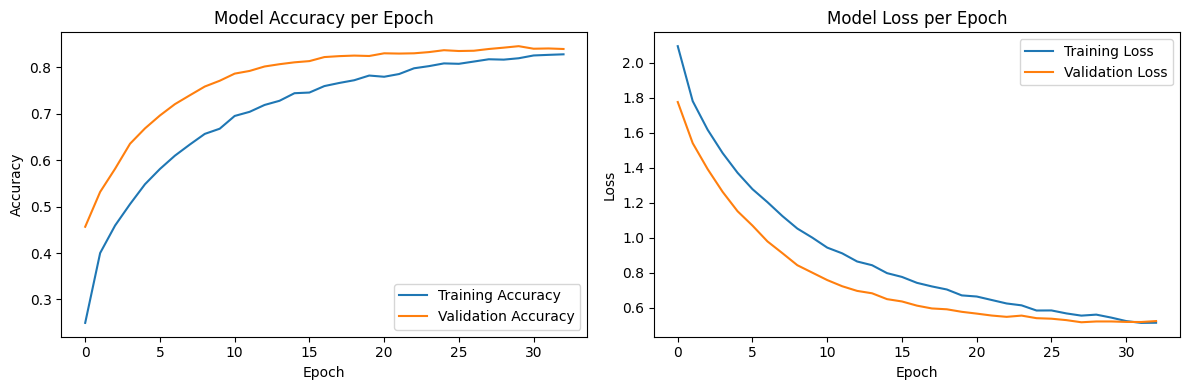

In [23]:
plt.figure(figsize=(12, 4))

# Visualisasi Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Visualisasi Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
